# 📊 Bernoulli and Binomial Distributions
## Applications in Machine Learning

**Subodh Acharya**  
Department of Artificial Intelligence, Kathmandu University  

---

## 1. Introduction to Probability Distributions

### Random Variables and Probability Distributions
**Random Variable (RV):** A numerical representation of the outcome of an experiment.

*   **Discrete RV:** Finite or countable outcomes (e.g., Bernoulli, Binomial, Multinomial).
*   **Continuous RV:** Infinite outcomes (e.g., Normal, Exponential).

**Probability Distribution:** Describes the probability of each possible outcome.

### PMF vs PDF

*   **PMF (Probability Mass Function):** For discrete variables. It gives the probability that a discrete random variable is exactly equal to some value.
    $$ P(X = x) $$

*   **PDF (Probability Density Function):** For continuous variables. It specifies the probability of the random variable falling within a particular range of values.
    $$ P(a \le X \le b) = \int_{a}^{b} f(x) dx $$

**Example:**
*   Coin toss → PMF
*   Height of people → PDF

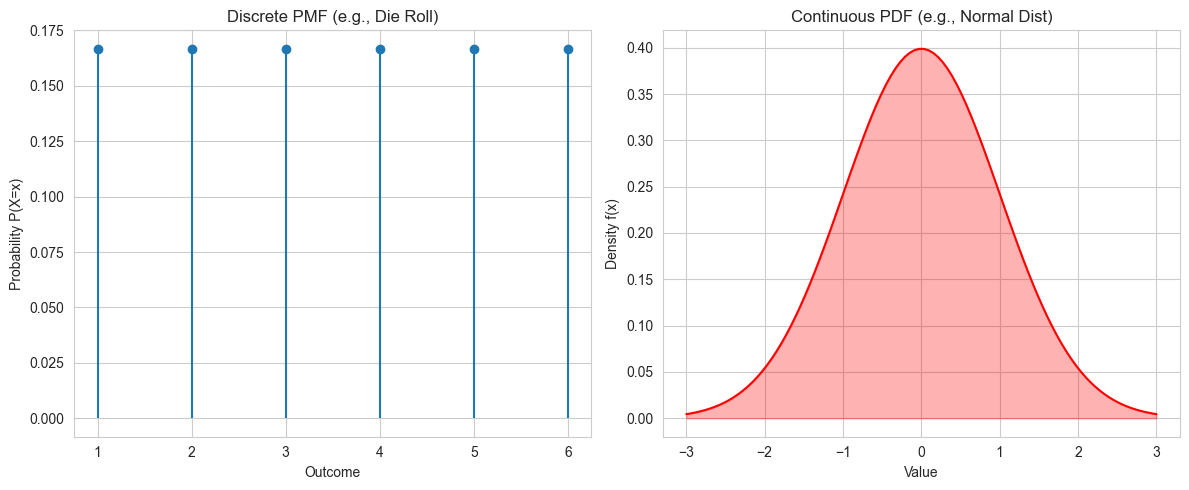

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom
from ipywidgets import interact, IntSlider, FloatSlider

sns.set_style("whitegrid")

def plot_pmf_vs_pdf_concept():
    # PMF Example: Die Roll
    die_outcomes = [1, 2, 3, 4, 5, 6]
    die_probs = [1/6] * 6
    
    # PDF Example: Normal Distribution
    x_norm = np.linspace(-3, 3, 100)
    y_norm = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_norm**2)
    
    plt.figure(figsize=(12, 5))
    
    # Discrete PMF
    plt.subplot(1, 2, 1)
    plt.stem(die_outcomes, die_probs, basefmt=" ")
    plt.title("Discrete PMF (e.g., Die Roll)")
    plt.ylabel("Probability P(X=x)")
    plt.xlabel("Outcome")
    
    # Continuous PDF
    plt.subplot(1, 2, 2)
    plt.plot(x_norm, y_norm, color='red')
    plt.fill_between(x_norm, y_norm, alpha=0.3, color='red')
    plt.title("Continuous PDF (e.g., Normal Dist)")
    plt.ylabel("Density f(x)")
    plt.xlabel("Value")
    
    plt.tight_layout()
    plt.show()

plot_pmf_vs_pdf_concept()

## 2. Bernoulli Distribution

### Bernoulli Trial and Random Variable
A **Bernoulli trial** is a single experiment with two possible outcomes:
$$ 
X = \begin{cases} 
1 & \text{Success} \\
0 & \text{Failure} 
\end{cases} 
$$

**Examples:** Coin toss, Pass/Fail exam, Yes/No response

### Bernoulli Distribution PMF

$$ P(X = x) = p^x(1 - p)^{1-x}, \quad x \in \{0, 1\} $$

*   $p$ = probability of success ($P(X=1)$)
*   $1 - p$ = probability of failure ($P(X=0)$)

### Variance of Bernoulli

$$ \text{Var}(X) = p(1 - p) $$

**Intuition:**
*   Measures uncertainty in a single trial.
*   Maximum variance occurs at $p = 0.5$ (most unpredictable).
*   Variance decreases as $p \to 0$ or $p \to 1$ (less uncertainty).
*   Standard Deviation: $\sigma = \sqrt{p(1-p)}$

In [2]:
def visualize_bernoulli(p=0.5):
    """
    Visualizes Bernoulli Distribution for a given probability p.
    """
    outcomes = [0, 1]
    probs = [1-p, p]
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(outcomes, probs, color=['salmon', 'skyblue'], width=0.4)
    plt.xticks(outcomes, ['Failure (0)', 'Success (1)'])
    plt.ylim(0, 1.1)
    plt.title(f"Bernoulli Distribution (p={p})\nVariance = {p*(1-p):.2f}")
    plt.ylabel("Probability")
    
    # Labeling bars
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f"{prob:.2f}", ha='center')
    
    plt.show()

# Interactive Slider for p
interact(visualize_bernoulli, p=FloatSlider(value=0.7, min=0.0, max=1.0, step=0.05, description='Prob Success (p)'));

interactive(children=(FloatSlider(value=0.7, description='Prob Success (p)', max=1.0, step=0.05), Output()), _…

### Bernoulli in Machine Learning
*   Binary classification outputs (Spam/Not Spam)
*   Logistic regression models each label as Bernoulli
*   Dropout mask sampling (0 = drop, 1 = keep)

## 3. Binomial Distribution

### Definition
Counts the number of successes in $n$ **independent** and **identical** Bernoulli trials, each with success probability $p$.

$$ X \sim \text{Binomial}(n, p), \quad X \in \{0, 1, 2, \dots, n\} $$

### Binomial PMF

$$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k} $$

Where:
*   $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to choose $k$ successes.
*   $p^k$ is the probability of the $k$ successes.
*   $(1-p)^{n-k}$ is the probability of the $n-k$ failures.

**Key Insight:** Probability decreases as we require more successes together.

In [3]:
def visualize_binomial(n=10, p=0.5):
    """
    Visualizes Binomial Distribution for n trials and probability p.
    """
    k_values = np.arange(0, n + 1)
    probabilities = binom.pmf(k_values, n, p)
    
    mean_val = n * p
    var_val = n * p * (1 - p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k_values, probabilities, color='teal', alpha=0.7)
    plt.plot(k_values, probabilities, 'bo-', markerfacecolor='red')
    
    plt.title(f"Binomial Distribution (n={n}, p={p})\nMean={mean_val:.1f}, Variance={var_val:.2f}")
    plt.xlabel("Number of Successes (k)")
    plt.ylabel("Probability P(X=k)")
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(k_values)
    plt.show()

interact(visualize_binomial, 
         n=IntSlider(value=10, min=1, max=50, step=1, description='Trials (n)'), 
         p=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.05, description='Prob Success (p)'));

interactive(children=(IntSlider(value=10, description='Trials (n)', max=50, min=1), FloatSlider(value=0.5, des…

### Key Concepts Recap
1.  **Binomial random variable:** counts number of successes in independent trials.
2.  **Sequences:** Each sequence with same number of successes/failures has the same probability.
3.  **Combinations:** $\binom{n}{k}$ counts how many sequences have exactly $k$ successes.

### Mean and Variance of Binomial

Taking the expectation of the sum of independent Bernoulli trials:

$$ E[X] = np $$

$$ \text{Var}(X) = np(1 - p) $$

**Example:**
Toss a biased coin $n=5$ times with $p=0.7$.
*   Mean: $5 \times 0.7 = 3.5$
*   Variance: $5 \times 0.7 \times 0.3 = 1.05$
*   SD: $\sqrt{1.05} \approx 1.025$

### Practical Exercise

**Problem 1:** Defect probability $p=0.05, n=20$. Find $P(X=2)$.  
**Problem 2:** Classifier accuracy $p=0.8, n=10$. Probability of 9 correct predictions.

In [4]:
def solve_practical_problems():
    # Problem 1
    n1, p1, k1 = 20, 0.05, 2
    prob1 = binom.pmf(k1, n1, p1)
    print(f"Problem 1: P(X=2) with n={n1}, p={p1} -> {prob1:.4f}")
    
    # Problem 2
    n2, p2, k2 = 10, 0.8, 9
    prob2 = binom.pmf(k2, n2, p2)
    print(f"Problem 2: P(X=9) with n={n2}, p={p2} -> {prob2:.4f}")

solve_practical_problems()

Problem 1: P(X=2) with n=20, p=0.05 -> 0.1887
Problem 2: P(X=9) with n=10, p=0.8 -> 0.2684


### Cumulative Distribution Function (CDF)

$$ F(k) = P(X \le k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1-p)^{n-i} $$

Represents probability of obtaining **at most** $k$ successes. Useful for hypothesis testing.

In [5]:
# Example CDF Calculation
print("CDF Example:")
print(f"Prob of getting AT MOST 2 heads in 5 tosses (p=0.5): {binom.cdf(2, 5, 0.5):.4f}")

CDF Example:
Prob of getting AT MOST 2 heads in 5 tosses (p=0.5): 0.5000


### Approximations

**1. Normal Approximation:**
For large $n$, Binomial approximates Normal:
$$ X \sim N(np, np(1-p)) $$
*Rule of thumb:* $np \ge 5$ and $n(1-p) \ge 5$.

**2. Poisson Approximation:**
If $n$ is large and $p$ is small, with $\lambda = np$ fixed:
$$ \text{Bin}(n, p) \approx \text{Poisson}(\lambda) $$
Use case: Rare events (e.g., failure rate).

### Applications in Machine Learning
*   **Feature Dropout:** Bernoulli sampling per neuron.
*   **Ensemble Accuracy:** Binomial models votes in bagging.
*   **Anomaly Detection:** Number of abnormal cases.
*   **A/B Testing:** Bernoulli outcomes across user groups.

---